In [2]:
%matplotlib inline
#import utils
#reload(utils)

import matplotlib.pyplot as plt
import numpy as np

from iterator import Iterator

print "Done loading everything"

Done loading everything


In [3]:
train_iterator = Iterator()
train_iterator.extract_center = False

In [4]:
# Get the forst 2000 images
xs, ys, cs  = train_iterator[0:2000]

In [10]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

def show_rep(data, coords, foo_transform):
    fig, ax = plt.subplots(figsize = (16, 16))
    for img, coord in zip(data, coords):
        d = foo_transform(img)#1.-img.reshape((28, 28))
        d = np.ma.masked_where(d == 0, d)
        imagebox = OffsetImage(d, zoom=0.5)
        ab = AnnotationBbox(imagebox, coord,
                        xybox=(0., 0.),
                        xycoords='data',
                        boxcoords="offset points",frameon=False)
        ax.add_artist(ab)
        
        
    #ax.set_xlim(3, max(coords[:,0]))
    #ax.set_ylim(7, max(coords[:,0]))
    ax.set_xlim(min(coords[:,0]), max(coords[:,0]))
    ax.set_ylim(min(coords[:,1]), max(coords[:,1]))    
    plt.show()

In [6]:
import numpy as np
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)

xs = np.array(xs)
ys = np.array(ys)
y_tsne = model.fit_transform(ys.reshape((ys.shape[0], -1))) 

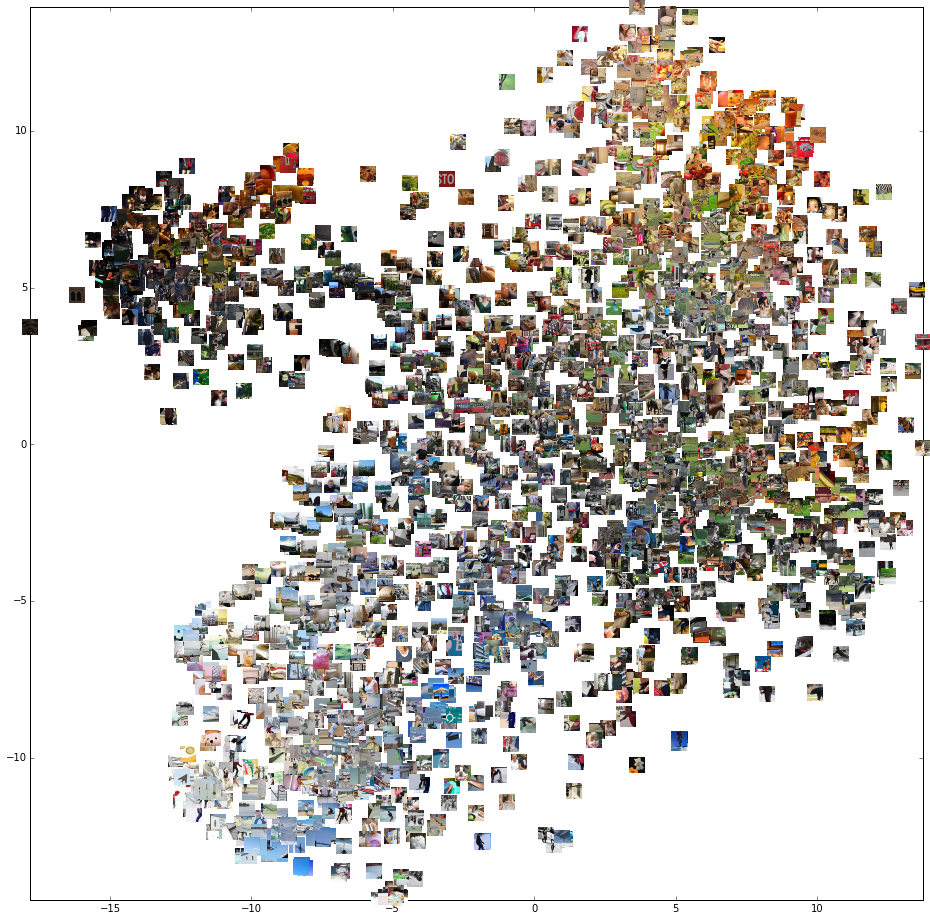

In [11]:
show_rep(ys,  y_tsne, lambda x: x.reshape((32,32, 3)))